# Regresi칩n lineal usando Pyspark
**Elaborado por: Naren Castellon**

Como hablamos sobre el aprendizaje autom치tico, es un campo muy amplio y hay m칰ltiples algoritmos que se clasifican en varias categor칤as, pero la regresi칩n lineal es uno de los algoritmos de aprendizaje autom치tico m치s fundamentales. Este cap칤tulo se centra en la construcci칩n de un modelo de regresi칩n lineal con PySpark y profundiza en el funcionamiento de un modelo LR. Cubrir치 varios supuestos a considerar antes de usar LR junto con diferentes m칠tricas de evaluaci칩n. Pero antes incluso de intentar comprender la regresi칩n lineal, debemos comprender los tipos de variables.

## Variables
Las variables capturan informaci칩n de datos en diferentes formas. Hay principalmente dos categor칤as de variables que se usan ampliamente, como se muestra en la Figura

<center><img src="https://raw.githubusercontent.com/narencastellon/databricks_pyspark/refs/heads/main/imagen/tipos-de-variables.png" width="800" height="500"></center>

Incluso podemos dividir estas variables en subcategor칤as, pero nos limitaremos a estos dos tipos a lo largo de este libro.

Las variables num칠ricas son ese tipo de valores que son de naturaleza cuantitativa, como los n칰meros (enteros/flotantes). Por ejemplo, los registros de salarios, los puntajes de los ex치menes, la edad o la estatura de una persona y los precios de las acciones se incluyen en la categor칤a de variables num칠ricas.

Las variables categ칩ricas, por otro lado, son de naturaleza cualitativa y representan principalmente categor칤as de datos que se est치n midiendo. Por ejemplo, colores, resultado (S칤/No), Calificaciones (Bueno/Deficiente/Promedio).

Para construir cualquier tipo de modelo de aprendizaje autom치tico, necesitamos tener variables de entrada y salida. Las variables de entrada son aquellos valores que se utilizan para construir y entrenar el modelo de aprendizaje autom치tico para predecir la variable de destino o de salida. Tomemos un ejemplo simple. Supongamos que queremos predecir el salario de una persona dada la edad de la persona que usa el aprendizaje autom치tico. En este caso, el salario es nuestra variable de salida/objetivo/dependiente ya que depende de la edad, lo que se conoce como entrada o variable independiente. Ahora la variable de salida puede ser de naturaleza categ칩rica o num칠rica y dependiendo de su tipo se eligen modelos de aprendizaje autom치tico.

Ahora, volviendo a la regresi칩n lineal, se usa principalmente en los casos en que intentamos predecir una variable de salida num칠rica. La regresi칩n lineal se usa para predecir una l칤nea que se ajusta a los datos de entrada, apunta de la mejor manera posible y puede ayudar en las predicciones de datos no vistos, pero el punto a notar aqu칤 es c칩mo puede un modelo aprender solo de la "edad" y predecir el salario. cantidad para una persona dada? Por supuesto, debe haber alg칰n tipo de relaci칩n entre estas dos variables (salario y edad). Hay dos tipos principales de relaciones variables:
* Lineal
* No lineal

La noci칩n de una relaci칩n lineal entre dos variables sugiere que ambas son proporcionales entre s칤 de alguna manera. La correlaci칩n entre dos variables nos da una indicaci칩n de cu치n fuerte o d칠bil es la relaci칩n lineal entre ellas. El coeficiente de correlaci칩n puede variar de -1 a + 1. La correlaci칩n negativa significa que al aumentar una de las variables, la otra variable disminuye. Por ejemplo, la potencia y el kilometraje de un veh칤culo pueden tener una correlaci칩n negativa porque a medida que aumentamos la potencia, el kilometraje de un veh칤culo disminuye. Por otro lado, el salario y los a침os de experiencia laboral son un ejemplo de variables correlacionadas positivamente. Las relaciones no lineales son de naturaleza comparativamente compleja y, por lo tanto, requieren una cantidad adicional de detalles para predecir las variables objetivo. Por ejemplo, en un autom칩vil aut칩nomo, la relaci칩n entre las variables de entrada, como el terreno, el sistema de se침ales y el peat칩n, y la velocidad del autom칩vil no son lineales.

**Nota** La siguiente secci칩n incluye la teor칤a detr치s de la regresi칩n lineal y podr칤a ser redundante para muchos lectores. Por favor, si칠ntase libre de omitir la secci칩n si este es el caso.

## Teor칤a
Ahora que comprendemos los conceptos b치sicos de las variables y las relaciones entre ellas, construyamos sobre el ejemplo de la edad y el salario para comprender la regresi칩n lineal en profundidad.

El objetivo general de la regresi칩n lineal es predecir una l칤nea recta a trav칠s de los datos, de modo que la distancia vertical de cada uno de estos puntos sea m칤nima desde esa l칤nea. Entonces, en este caso, predeciremos el salario de una persona dada una edad. 

### Paso 1: crear el objeto SparkSession
Iniciamos Jupyter Notebook e importamos SparkSession y creamos un nuevo objeto `SparkSession` para usar Spark:

In [0]:
#create sparksession object
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Regresi칩n_lineal').getOrCreate()

import warnings
warnings.filterwarnings("ignore")

### Paso 2: Leer el conjunto de datos
Luego cargamos y leemos el conjunto de datos dentro de Spark usando Dataframe. Tenemos que asegurarnos de haber abierto PySpark desde la misma carpeta de directorio donde est치 disponible el conjunto de datos o, de lo contrario, debemos mencionar la ruta del directorio de la carpeta de datos:

In [0]:
#import Linear Regression from spark's MLlib
from pyspark.ml.regression import LinearRegression
from pyspark.sql import functions as F

In [0]:
# Cargamos los datos

#filename = "/FileStore/tables/Linear_regression_dataset.csv"

filename = "/FileStore/tables/housing.csv"

df = spark.read.csv(filename, header=True, inferSchema=True, sep=',')
#display(df)
df.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

### Paso 3: An치lisis de datos exploratorios
En esta secci칩n, profundizamos en el conjunto de datos mediante la visualizaci칩n del conjunto de datos, la validaci칩n de la forma del conjunto de datos, varias medidas estad칤sticas y las correlaciones entre las variables de entrada y salida. Empezamos comprobando la forma del conjunto de datos.

In [0]:
# Tama침o de mis datos 
print((df.count(), len(df.columns)))

(20640, 10)


El resultado anterior confirma el tama침o de nuestro conjunto de datos, y podemos validar los tipos de datos de los valores de entrada para verificar si necesitamos cambiar/convertir los tipos de datos de las columnas. En este ejemplo, todas las columnas contienen valores enteros o dobles.

In [0]:
#explore the data
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



Hay un total de seis columnas, de las cuales cinco son columnas de entrada (var_1 a var_5) y columna de destino (salida). Ahora podemos usar la funci칩n de descripci칩n para repasar las medidas estad칤sticas del conjunto de datos.

In [0]:
#view statistical measures of data 
df.describe().show(5,False)

+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|summary|longitude          |latitude         |housing_median_age|total_rooms       |total_bedrooms    |population        |households       |median_income     |median_house_value|ocean_proximity|
+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|count  |20640              |20640            |20640             |20640             |20433             |20640             |20640            |20640             |20640             |20640          |
|mean   |-119.56970445736148|35.6318614341087 |28.639486434108527|2635.7630813953488|537.8705525375618 |1425.4767441860465|499.5396802325581|3.8706710029070246|206855.81690891474|null           |
|stddev |2.003531723

In [0]:
#df.summary().display()

df.summary().show()

+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|summary|          longitude|         latitude|housing_median_age|       total_rooms|    total_bedrooms|        population|       households|     median_income|median_house_value|ocean_proximity|
+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|  count|              20640|            20640|             20640|             20640|             20433|             20640|            20640|             20640|             20640|          20640|
|   mean|-119.56970445736148| 35.6318614341087|28.639486434108527|2635.7630813953488| 537.8705525375618|1425.4767441860465|499.5396802325581|3.8706710029070246|206855.81690891474|           null|
| stddev|  2.0035317

Esto nos permite tener una idea de la distribuci칩n, la medida del centro y la dispersi칩n de las columnas de nuestro conjunto de datos. Luego echamos un vistazo al conjunto de datos usando la funci칩n head y pasamos el n칰mero de filas que queremos ver.

In [0]:
from pyspark.sql.types import * 
from pyspark.sql.functions import * 

In [0]:
for colu in df.columns:
    miss = df.filter(col(colu).isNull()).count()
    print(f"{colu} columna {miss} tiene missing value.")

longitude columna 0 tiene missing value.
latitude columna 0 tiene missing value.
housing_median_age columna 0 tiene missing value.
total_rooms columna 0 tiene missing value.
total_bedrooms columna 207 tiene missing value.
population columna 0 tiene missing value.
households columna 0 tiene missing value.
median_income columna 0 tiene missing value.
median_house_value columna 0 tiene missing value.
ocean_proximity columna 0 tiene missing value.


In [0]:
# estimamo la media
mean_bedroom = df.select(mean(df['total_bedrooms'])).collect()[0][0]
mean_bedroom

Out[11]: 537.8705525375618

In [0]:
df = df.na.fill({'total_bedrooms': mean_bedroom})
#la funci칩n de control tiene alg칰n valor faltante
df.filter(col("total_bedrooms").isNull()).count()

Out[12]: 0

Podemos verificar la correlaci칩n entre las variables de entrada y las variables de salida usando la funci칩n corr:

In [0]:
#import corr function from pyspark functions
from pyspark.sql.functions import corr

In [0]:
# check for correlation
df.select(corr("population",  "median_income")).show()

+-------------------------------+
|corr(population, median_income)|
+-------------------------------+
|           0.004834345627653...|
+-------------------------------+



var_1 parece estar m치s fuertemente correlacionado con la columna de salida.

### Paso 4: Ingenier칤a de caracter칤sticas
Esta es la parte en la que creamos un solo vector que combina todas las caracter칤sticas de entrada mediante el `VectorAssembler` de Spark. Crea solo una caracter칤stica 칰nica que captura los valores de entrada para esa fila. Entonces, en lugar de cinco columnas de entrada, esencialmente fusiona todas las columnas de entrada en una sola columna de vector de caracter칤sticas.

In [0]:
df.show()
#display(df)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

In [0]:
from pyspark.ml.feature import StringIndexer 
from pyspark.ml.feature import VectorAssembler

# StringIndexer ile 'ocean_proximity' label to numeric
stringIndexer = StringIndexer(inputCol="ocean_proximity", outputCol="ocean_proximity_idx")
stringIndexerModel = stringIndexer.fit(df)  # Ftting Traing
df_transformed = stringIndexerModel.transform(df)

In [0]:
df_transformed.show(5)
#display(df_transformed)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+-------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|ocean_proximity_idx|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+-------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|                3.0|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|                3.0|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|                3.0|
|  -122.25|   37.85|              52.0|     1274.0| 

In [0]:
df1 = df_transformed.drop("ocean_proximity")

In [0]:
df1.show()
#display(df1)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+-------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity_idx|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+-------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|                3.0|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|                3.0|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|                3.0|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|                3.0|
|  -12

In [0]:
#import vectorassembler to create dense vectors
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

Se puede seleccionar la cantidad de columnas que se usar칤an como caracter칤sticas de entrada y solo se pueden pasar esas columnas a trav칠s de VectorAssembler. En nuestro caso, pasaremos las cinco columnas de entrada para crear una 칰nica columna de vector de caracter칤sticas.

In [0]:
#select the columns to create input vector
df.columns

Out[35]: ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [0]:
# Creamos el vector assembler             Variables independientes                         Vector 
vec_assmebler = VectorAssembler(inputCols=["ocean_proximity_idx", "longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"],
    outputCol="features")

In [0]:
#transform the values
features_df = vec_assmebler.transform(df1)

In [0]:
#validate the presence of dense vectors 
features_df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = false)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity_idx: double (nullable = false)
 |-- features: vector (nullable = true)



In [0]:
#features_df.display()
features_df.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+-------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity_idx|            features|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+-------------------+--------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|                3.0|[3.0,-122.23,37.8...|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|                3.0|[3.0,-122.22,37.8...|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|                3.0|[3.0,-122.24,37.8...|
|  -122.25|   37.85|  

Como podemos ver, tenemos una columna adicional ("caracter칤sticas") que contiene el 칰nico vector denso para todas las entradas.

In [0]:
#view the details of dense vector
features_df.select('features').show(5,False)

+-----------------------------------------------------------+
|features                                                   |
+-----------------------------------------------------------+
|[3.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252]    |
|[3.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014]|
|[3.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574]   |
|[3.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431]   |
|[3.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462]   |
+-----------------------------------------------------------+
only showing top 5 rows



Tomamos el subconjunto del marco de datos y seleccionamos solo la columna de caracter칤sticas y la columna de salida para construir el modelo de regresi칩n lineal.

In [0]:
# Creamos una nueva tabla con el vector y la variable de salidad
model_df = features_df.select('features',"median_house_value")

In [0]:
model_df.show(5,False)

+-----------------------------------------------------------+------------------+
|features                                                   |median_house_value|
+-----------------------------------------------------------+------------------+
|[3.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252]    |452600.0          |
|[3.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014]|358500.0          |
|[3.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574]   |352100.0          |
|[3.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431]   |341300.0          |
|[3.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462]   |342200.0          |
+-----------------------------------------------------------+------------------+
only showing top 5 rows



In [0]:
#size of model df
print((model_df.count(), len(model_df.columns)))

(20640, 2)


### Paso 5: dividir el conjunto de datos
Tenemos que dividir el conjunto de datos en un conjunto de datos de prueba y entrenamiento para entrenar y evaluar el rendimiento del modelo de regresi칩n lineal construido. Lo dividimos en una proporci칩n de 70/30 y entrenamos nuestro modelo en el 70 % del conjunto de datos. Podemos imprimir la forma del tren y probar los datos para validar el tama침o.

In [0]:
# Dividir los datos en entrenamiento y en datos de prueba
train_df,test_df = model_df.randomSplit([0.7,0.3])

In [0]:
train_df.show()

+--------------------+------------------+
|            features|median_house_value|
+--------------------+------------------+
|[0.0,-124.14,40.5...|           92500.0|
|[0.0,-124.13,40.5...|           94800.0|
|[0.0,-124.11,40.5...|           74100.0|
|[0.0,-124.1,40.47...|           55000.0|
|[0.0,-124.1,40.5,...|           57500.0|
|[0.0,-124.09,40.4...|           70500.0|
|[0.0,-124.05,40.5...|           95200.0|
|[0.0,-124.02,40.7...|          119900.0|
|[0.0,-124.02,40.8...|          133900.0|
|[0.0,-124.01,40.8...|           75600.0|
|[0.0,-124.0,40.22...|           70700.0|
|[0.0,-123.96,40.5...|           92600.0|
|[0.0,-123.85,39.3...|          140500.0|
|[0.0,-123.85,39.4...|          150000.0|
|[0.0,-123.84,39.4...|          110400.0|
|[0.0,-123.84,40.2...|           74000.0|
|[0.0,-123.83,41.8...|          116700.0|
|[0.0,-123.82,40.1...|           82400.0|
|[0.0,-123.82,40.1...|           76800.0|
|[0.0,-123.81,39.3...|          277000.0|
+--------------------+------------

In [0]:
print((train_df.count(), len(train_df.columns)))

(14369, 2)


In [0]:
print((test_df.count(), len(test_df.columns)))

(6271, 2)


In [0]:
train_df.describe().show()

+-------+------------------+
|summary|median_house_value|
+-------+------------------+
|  count|             14369|
|   mean|206373.64256385274|
| stddev|115272.75365586905|
|    min|           14999.0|
|    max|          500001.0|
+-------+------------------+



### Paso 6: construir y entrenar el modelo de regresi칩n lineal
En esta parte, construimos y entrenamos el modelo de regresi칩n lineal utilizando las funciones de las columnas de entrada y salida. Tambi칠n podemos obtener los valores de los coeficientes (B1, B2, B3, B4, B5) e interceptar (B0) del modelo. Tambi칠n podemos evaluar el rendimiento del modelo en los datos de entrenamiento usando r2. Este modelo ofrece una muy buena precisi칩n (86 %) en conjuntos de datos de entrenamiento.

In [0]:
from pyspark.ml.regression import LinearRegression

In [0]:
# construyo Linear Regression model 
lin_Reg = LinearRegression(labelCol = 'median_house_value') # labelcol= la variable objetivo o Target 

In [0]:
# Se entrena el modelo
lr_model = lin_Reg.fit(train_df) # utliza los datos de entrenamiento

In [0]:
pred = lr_model.transform(test_df)
pred.show()

+--------------------+------------------+------------------+
|            features|median_house_value|        prediction|
+--------------------+------------------+------------------+
|[0.0,-124.14,40.5...|           75100.0| 140308.6643600231|
|[0.0,-124.1,40.5,...|           72300.0|133778.79907925613|
|[0.0,-124.09,40.5...|           97300.0| 145010.5823822678|
|[0.0,-124.03,40.4...|           71300.0|148804.60690590693|
|[0.0,-124.01,40.9...|          102700.0| 144358.1706643547|
|[0.0,-124.0,40.92...|           98800.0| 159510.9085718603|
|[0.0,-123.98,40.8...|           84200.0| 146779.7477645902|
|[0.0,-123.91,41.6...|          152700.0| 98173.41901279287|
|[0.0,-123.88,40.9...|          106300.0|145758.68061415944|
|[0.0,-123.85,41.3...|           36700.0| 41735.05574668199|
|[0.0,-123.8,39.44...|           95000.0|184271.47211451596|
|[0.0,-123.8,39.47...|          150300.0| 188229.9204102992|
|[0.0,-123.79,39.4...|          116200.0|185439.59222637024|
|[0.0,-123.79,39.5...|  

In [0]:
print("La intercepci칩n del Modelo es:",lr_model.intercept)

La intercepci칩n del Modelo es: -3613942.5041313637


In [0]:
print("Los coeficiente del modelos son:", lr_model.coefficients)

Los coeficiente del modelos son: [-1724.585224657371,-42877.099498899,-42188.39803139559,1208.0792720413178,-7.072015351788792,86.57533661519366,-38.25393184331701,73.66305073262359,39904.995725099296]


In [0]:
# predici칩n del modelo 
training_predictions = lr_model.evaluate(train_df)
training_predictions

Out[31]: <pyspark.ml.regression.LinearRegressionSummary at 0x7f5722fb8a30>

In [0]:
print("El MSE es:", training_predictions.meanSquaredError)

El MSE es: 4862583157.624832


In [0]:
print("El R2 es:",training_predictions.r2)

El R2 es: 0.6348355985695227


### Paso 7: evaluar el modelo de regresi칩n lineal en datos de prueba
La parte final de todo este ejercicio es verificar el rendimiento del modelo en datos no vistos o de prueba. Usamos la funci칩n de evaluaci칩n para hacer predicciones para los datos de prueba y podemos usar r2 para verificar la precisi칩n del modelo en los datos de prueba. El rendimiento parece ser casi similar al del entrenamiento.

In [0]:
# Haciendo la prediciones con los datos de prueba
test_results = lr_model.evaluate(test_df)

In [0]:
test_results

Out[38]: <pyspark.ml.regression.LinearRegressionSummary at 0x7f572805efa0>

In [0]:
#view the residual errors based on predictions 
test_results.residuals.show(10)

+-------------------+
|          residuals|
+-------------------+
|-65208.664360023104|
| -61478.79907925613|
| -47710.58238226781|
| -77504.60690590693|
| -41658.17066435469|
| -60710.90857186029|
|-62579.747764590196|
| 54526.580987207126|
| -39458.68061415944|
| -5035.055746681988|
+-------------------+
only showing top 10 rows



In [0]:
#coefficient of determination value for model
print("El R2 para el conjunto de Prueba es.",test_results.r2)

El R2 para el conjunto de Prueba es. 0.6374754868251551


In [0]:
print("EL RMSE para el Test es:",test_results.rootMeanSquaredError)

EL RMSE para el Test es: 69474.11860217551


In [0]:
print("EL MSE para el Test es:",test_results.meanSquaredError)

EL MSE para el Test es: 4826653155.54915


In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
# Performans Metric
evaluator = RegressionEvaluator(labelCol = "median_house_value", predictionCol="prediction")
lrRmse = evaluator.evaluate(pred, {evaluator.metricName: "rmse"})
lrMae = evaluator.evaluate(pred, {evaluator.metricName: "mae"})
lrR2 = evaluator.evaluate(pred, {evaluator.metricName: "r2"})
print(f"Linear Regression - RMSE: {lrRmse}")
print(f"Linear Regression - MAE: {lrMae}")
print(f"Linear Regression - R^2: {lrR2}")

Linear Regression - RMSE: 69474.11860217551
Linear Regression - MAE: 50866.896068147194
Linear Regression - R^2: 0.6374754868251551


In [0]:
pred.show(5)

+--------------------+------------------+------------------+
|            features|median_house_value|        prediction|
+--------------------+------------------+------------------+
|[0.0,-124.14,40.5...|           75100.0| 140308.6643600231|
|[0.0,-124.1,40.5,...|           72300.0|133778.79907925613|
|[0.0,-124.09,40.5...|           97300.0| 145010.5823822678|
|[0.0,-124.03,40.4...|           71300.0|148804.60690590693|
|[0.0,-124.01,40.9...|          102700.0| 144358.1706643547|
+--------------------+------------------+------------------+
only showing top 5 rows



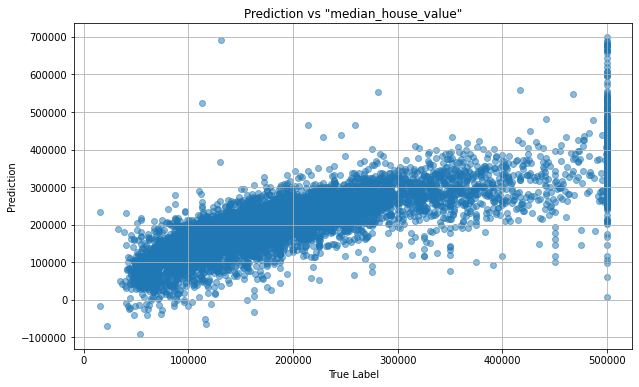

In [0]:
import matplotlib.pyplot as plt

# Pandas DataFrame
resultado = pred.select("prediction", "median_house_value").toPandas()
# Graph for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(resultado["median_house_value"], resultado['prediction'], alpha=0.5)
plt.xlabel('True Label')
plt.ylabel('Prediction')
plt.title('Prediction vs "median_house_value"')
plt.grid(True)
plt.show()

## Conclusi칩n
En este modulo, repasamos el proceso de construcci칩n de un modelo de regresi칩n lineal usando PySpark y tambi칠n explicamos el proceso detr치s de encontrar los coeficientes y valores de intercepci칩n m치s 칩ptimos.

 
# MLFlow

In [0]:
import mlflow
import mlflow.spark

In [0]:
from pyspark.ml.regression import LinearRegression

# Iniciar una nueva corrida de MLflow
with mlflow.start_run():
    # Crear y entrenar el modelo de regresi칩n lineal
    lr = LinearRegression(featuresCol='features', labelCol='median_house_value')
    lr_model = lr.fit(train_df)
    
    # Hacer predicciones
    predictions = lr_model.transform(test_df)
    predictions.show(5)

    # Registrar el modelo con MLflow
    mlflow.spark.log_model(lr_model, "model")

    # Registrar m칠tricas y par치metros
    mlflow.log_param("intercept", lr_model.intercept)
    mlflow.log_param("num_features", len(lr_model.coefficients))
    mlflow.log_metric("rmse", lr_model.summary.rootMeanSquaredError)
    mlflow.log_metric("r2", lr_model.summary.r2)


    print("Modelo registrado y par치metros guardados con MLflow")


+--------------------+------------------+------------------+
|            features|median_house_value|        prediction|
+--------------------+------------------+------------------+
|[0.0,-124.14,40.5...|           75100.0| 140308.6643600231|
|[0.0,-124.1,40.5,...|           72300.0|133778.79907925613|
|[0.0,-124.09,40.5...|           97300.0| 145010.5823822678|
|[0.0,-124.03,40.4...|           71300.0|148804.60690590693|
|[0.0,-124.01,40.9...|          102700.0| 144358.1706643547|
+--------------------+------------------+------------------+
only showing top 5 rows



2024/11/05 22:49:59 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2024/11/05 22:50:20 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/375575719403548/3c4aeb1d6b0c4ff5b69c88cd755705e6/artifacts/model/sparkml, flavor: spark). Fall back to return ['pyspark==3.3.2', 'pandas<2']. Set logging level to DEBUG to see the full traceback. 
2024/11/05 22:50:21 INFO mlflow.tracking._tracking_service.client: 游끢 View run flawless-shrimp-354 at: https://community.cloud.databricks.com/ml/experiments/375575719403548/runs/3c4aeb1d6b0c4ff5b69c88cd755705e6.
2024/11/05 22:50:21 INFO mlflow.tracking._tracking_service.client: 游빍 View experiment at: https://community.cloud.databricks.com/ml/experiments/375575719403548.


Modelo registrado y par치metros guardados con MLflow
